## Data preprocessing 

### Importing necessary libraries 

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
#Importing dataset
df=pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


In [9]:
#Arranding correlation in descnding order
df.corr().Profit.sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.964770
Marketing Spend    0.748957
Administration     0.198849
Name: Profit, dtype: float64

### Handling null values 

In [11]:
#Handling null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [14]:
#Checking categories in state cloumn
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [15]:
#Checking number of each category
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

### Data visualization 

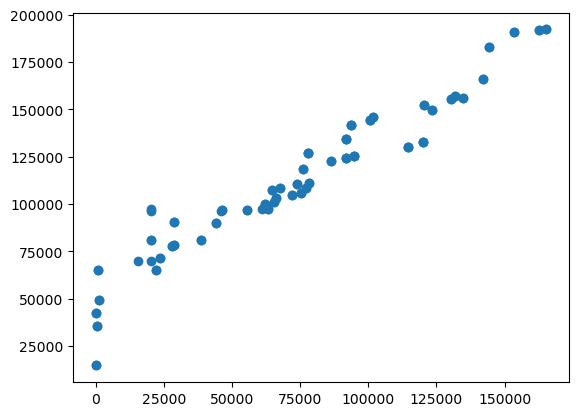

In [19]:
#Plotting scatter plot between profit and R$D
plt.scatter(df["R&D Spend"],df["Profit"])
plt.show()

<AxesSubplot:>

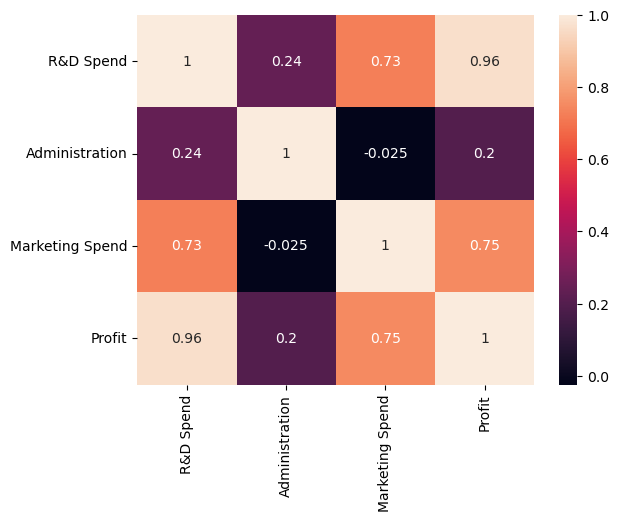

In [22]:
#PLotting heatmap for correlation
sns.heatmap(df.corr(),annot=True)

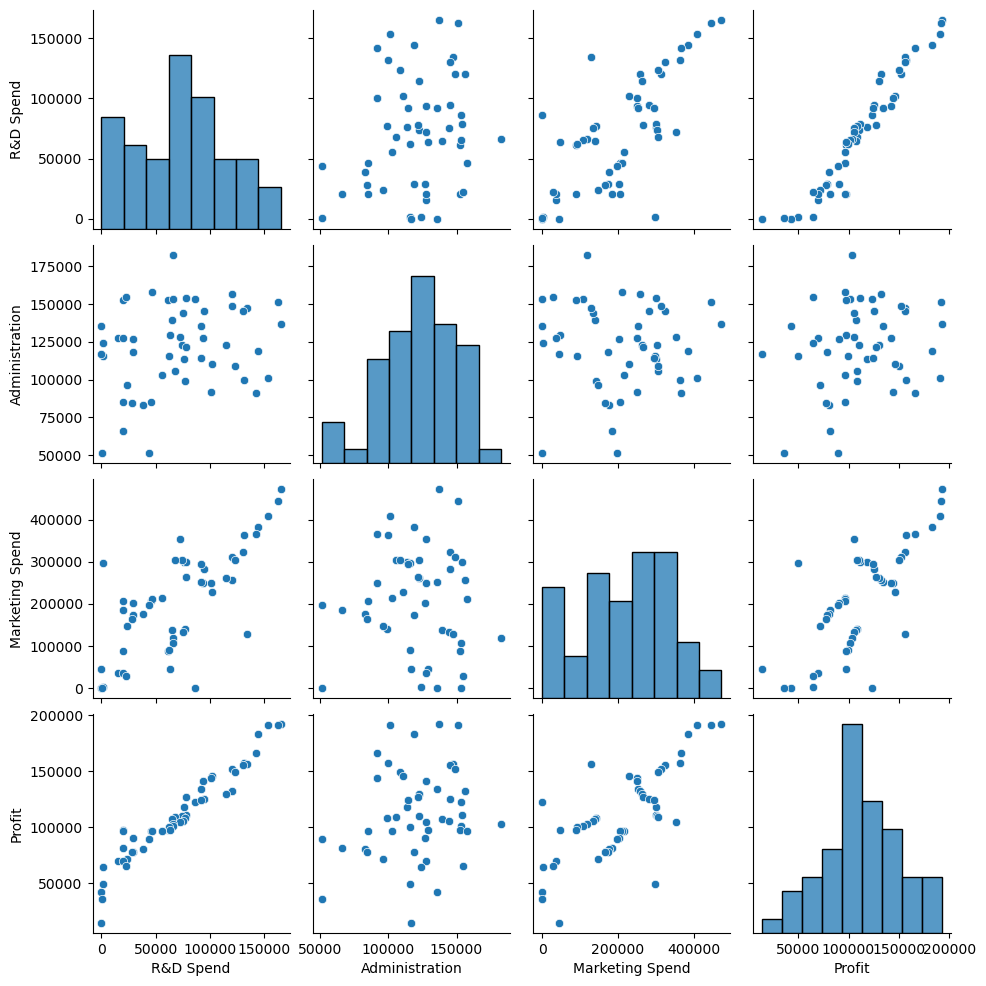

In [25]:
#Checking dependency of all columns using pairplot
sns.pairplot(df)
plt.show()

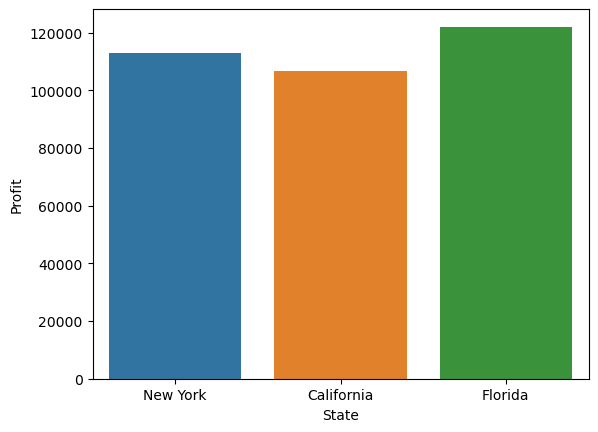

In [26]:
sns.barplot(x=df["State"],y=df["Profit"],ci=0)
plt.show()

### Outlier detection and handling

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


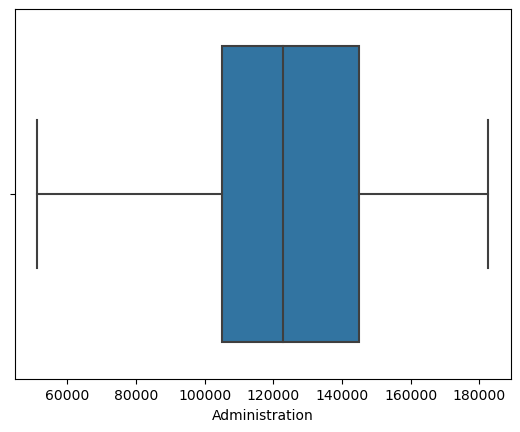

In [28]:
sns.boxplot(df["Administration"])
plt.show()

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


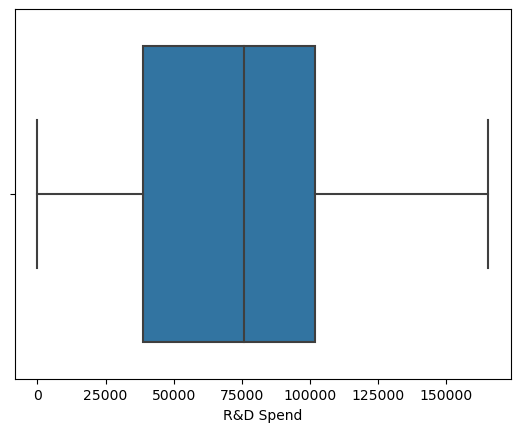

In [30]:
sns.boxplot(df["R&D Spend"])
plt.show()

### Seperating independent and dependent variables 

In [31]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
#Indpendent variables -> Should be a 2D array
x=df.drop(columns=["Profit"])
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [36]:
#Dependent variable -> Should be a 1D array
y=df["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### Encoding 

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [40]:
#Label endocding state column
x["State"]=le.fit_transform(x["State"])
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


### Feature scaling 

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
ms=MinMaxScaler()

In [49]:
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [50]:
x_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5


### Splitting data into training and testing set

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

## Model building

### Import model building libraries 

In [53]:
from sklearn.linear_model import LinearRegression

### Initializing the model 

In [54]:
lr=LinearRegression()

### Training the model 

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

### Test the model 

In [60]:
y_pred=lr.predict(x_test)

In [59]:
profit=pd.DataFrame({"Actual profit":y_test,"Predicted profit":y_pred})
profit

,Actual profit,Predicted profit
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


In [63]:
#Random value prediction
lr.predict(ms.transform([[165349.20,136897.80,471784.10,2]]))

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([193329.17668167])

### Evaluation of the model 

In [64]:
from sklearn import metrics

In [66]:
#Calculating R^2
print(metrics.r2_score(y_test,y_pred))

0.9258962347553816


In [67]:
#Calculating mean squared error
print(metrics.mean_squared_error(y_test,y_pred))

96015241.54707728


In [71]:
#Calculating root mean squared error
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

9798.736732205702
